# Fingerprints Quality Classification
## DNN Course JCE - Final Project 
### By Kobi Amsellem & Zohar Kedem

Expirements:
* Try to classify 5 classes that represat the quality of the finger print (0 poor, 4 best)

In [2]:
# Relevenat includes
import numpy as np
import tensorflow as tf
import keras
import pathlib
import PIL
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

**Hyperparameters**

In [3]:
batch_size = 32
img_height = 180
img_width = 180
validation_split = 0.3
seed=123

**Loading data to train and validation tensors**

In [7]:
data_dir = pathlib.Path('./Dataset')
count = len(list(data_dir.glob('*/*.jpg')))
print('Total: ', count, ' examples')


train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="training",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels='inferred',
  label_mode='categorical',
  )

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset="validation",
  seed=seed,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  labels='inferred',
  label_mode='categorical',
  )

Total:  976  examples
Found 976 files belonging to 5 classes.
Using 684 files for training.
Found 976 files belonging to 5 classes.
Using 292 files for validation.


/Users/kobiamsellem/Desktop/לימודים/שנה ד/סמסטר א/רשתות נוירונים/Final_Project/tensorflow-metal/lib/python3.8/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


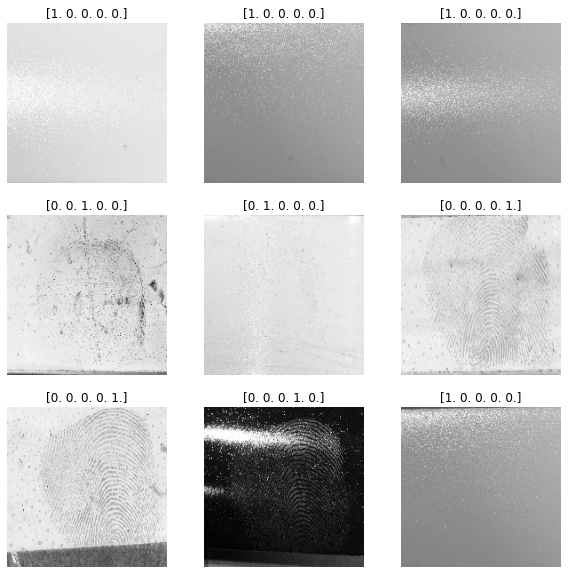

In [4]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(labels[i].numpy())
    plt.axis("off")

In [31]:
resnet_model = tf.keras.Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)


In [32]:
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(512, activation='relu'))
resnet_model.add(tf.keras.layers.Dropout(0.2))
resnet_model.add(tf.keras.layers.Dense(128, activation='relu'))
resnet_model.add(tf.keras.layers.Dropout(0.3))
resnet_model.add(tf.keras.layers.Dense(32, activation='relu'))
resnet_model.add(tf.keras.layers.Dropout(0.4))
resnet_model.add(tf.keras.layers.Dense(5, activation='softmax'))
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_11 (Flatten)        (None, 2048)              0         
                                                                 
 dense_38 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_27 (Dropout)        (None, 512)               0         
                                                                 
 dense_39 (Dense)            (None, 128)               65664     
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_40 (Dense)            (None, 32)               

In [33]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


2021-12-31 11:30:40.066347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - ETA: 0s - loss: 1.5384 - accuracy: 0.3860

2021-12-31 11:30:47.212766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 14s 412ms/step - loss: 1.5384 - accuracy: 0.3860 - val_loss: 1.1316 - val_accuracy: 0.5719
Epoch 2/10
22/22 [==============================] - 5s 216ms/step - loss: 1.1875 - accuracy: 0.5278 - val_loss: 1.0455 - val_accuracy: 0.5788
Epoch 3/10
22/22 [==============================] - 5s 223ms/step - loss: 1.1088 - accuracy: 0.5526 - val_loss: 0.9895 - val_accuracy: 0.6301
Epoch 4/10
22/22 [==============================] - 5s 215ms/step - loss: 1.0044 - accuracy: 0.5994 - val_loss: 0.9616 - val_accuracy: 0.6027
Epoch 5/10
22/22 [==============================] - 5s 215ms/step - loss: 0.9896 - accuracy: 0.6199 - val_loss: 0.8974 - val_accuracy: 0.6301
Epoch 6/10
22/22 [==============================] - 5s 208ms/step - loss: 0.9126 - accuracy: 0.6477 - val_loss: 0.9265 - val_accuracy: 0.6199
Epoch 7/10
22/22 [==============================] - 5s 208ms/step - loss: 0.8320 - accuracy: 0.6667 - val_loss: 0.8739 - val_accuracy: 0.6336
Epoch 8/10
22/22

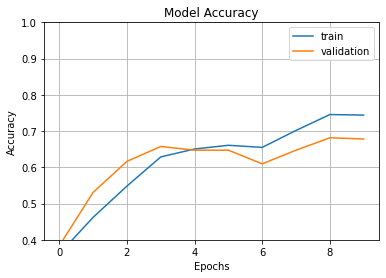

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [9]:
import cv2
image=cv2.imread('test.jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

ModuleNotFoundError: No module named 'cv2'

In [63]:
pred=resnet_model.predict(image)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)